In [111]:
import	pymysql
import	pandas	as	pd
import	csv
import pymysql.cursors

conn=pymysql.connect(host='172.20.145.44',	user='kim',	password='1234',
db='mini_project',	charset='utf8')

cur	=conn.cursor(pymysql.cursors.DictCursor)

In [112]:
sql = '''
select  co.Rank,co.Country, co.Price, co.Rank, gd.Year_2022 , gd.Year_2023, gd.Year_2024
from coca co
inner join gdp_data gd
on co.Country = gd.Country
'''
cur.execute(sql)
rows = cur.fetchall()
coca =	pd.DataFrame(rows)
print(coca)

    Rank      Country  Price  co.Rank Year_2022 Year_2023 Year_2024
0      1  Switzerland  5.02         1   818.643   885.141   938.458
1      2      Denmark  3.88         2   400.167   405.199   409.989
2      3   Luxembourg  3.47         3    81.706     85.78    88.556
3      4       Norway  3.15         4   593.727   485.513   526.951
4      5      Austria  3.14         5   471.216    519.71   540.887
..   ...          ...    ...      ...       ...       ...       ...
84    91        India  0.44        91  3,353.47  3,572.08  3,937.01
85    92         Iraq  0.42        92   261.369   254.416   265.894
86    93        Egypt  0.33        93   475.231   393.909   347.594
87    94     Pakistan  0.32        94   374.748   338.237       n/a
88    95   Bangladesh  0.28        95   460.201   446.349   455.162

[89 rows x 7 columns]


In [113]:
coca["Year_2024"]

0      938.458
1      409.989
2       88.556
3      526.951
4      540.887
        ...   
84    3,937.01
85     265.894
86     347.594
87         n/a
88     455.162
Name: Year_2024, Length: 89, dtype: object

In [49]:
coca

,Country,Price,Rank,Year_2022,Year_2023,Year_2024
0,Switzerland,5.02,1,818.643,885.141,938.458
1,Denmark,3.88,2,400.167,405.199,409.989
2,Luxembourg,3.47,3,81.706,85.78,88.556
3,Norway,3.15,4,593.727,485.513,526.951
4,Austria,3.14,5,471.216,519.71,540.887
...,...,...,...,...,...,...
84,India,0.44,91,"3,353.47","3,572.08","3,937.01"
85,Iraq,0.42,92,261.369,254.416,265.894
86,Egypt,0.33,93,475.231,393.909,347.594
87,Pakistan,0.32,94,374.748,338.237,n/a


In [114]:
# 'Country' 열에서 중복된 값이 있는지 여부 확인
has_duplicates = coca['Country'].duplicated().any()
print(has_duplicates)  # 중복이 있으면 True, 없으면 False

False


In [115]:

# 이건 위에꺼 국가 가격 순위를  순위 가격 국가로 바꾼거  민하님 오면 돌리기-------------돌린다음 순서대로 뽑아보기

sql = '''
select co.Rank, co.Price, co.Country, gd.Year_2022 , gd.Year_2023, gd.Year_2024
from coca co
inner join gdp_data gd
on co.Country = gd.Country
'''
cur.execute(sql)
rows = cur.fetchall()
coca =	pd.DataFrame(rows)
print(coca)

    Rank  Price      Country Year_2022 Year_2023 Year_2024
0      1  5.02   Switzerland   818.643   885.141   938.458
1      2  3.88       Denmark   400.167   405.199   409.989
2      3  3.47    Luxembourg    81.706     85.78    88.556
3      4  3.15        Norway   593.727   485.513   526.951
4      5  3.14       Austria   471.216    519.71   540.887
..   ...    ...          ...       ...       ...       ...
84    91  0.44         India  3,353.47  3,572.08  3,937.01
85    92  0.42          Iraq   261.369   254.416   265.894
86    93  0.33         Egypt   475.231   393.909   347.594
87    94  0.32      Pakistan   374.748   338.237       n/a
88    95  0.28    Bangladesh   460.201   446.349   455.162

[89 rows x 6 columns]


In [74]:
# 한글 폰트 설정 ->폰트 매니저 모듈
from matplotlib import font_manager as fm
from matplotlib import rc

# 적용할 폰트 파일
font_file=r'C:\Windows\Fonts\batang.ttc'

# 폰트 패밀리
font_name= fm.FontProperties(fname=font_file).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name) 

C:\Users\LG\AppData\Local\Temp\ipykernel_12952\2378138088.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['Country'], rotation=45, ha='right', fontsize=15)


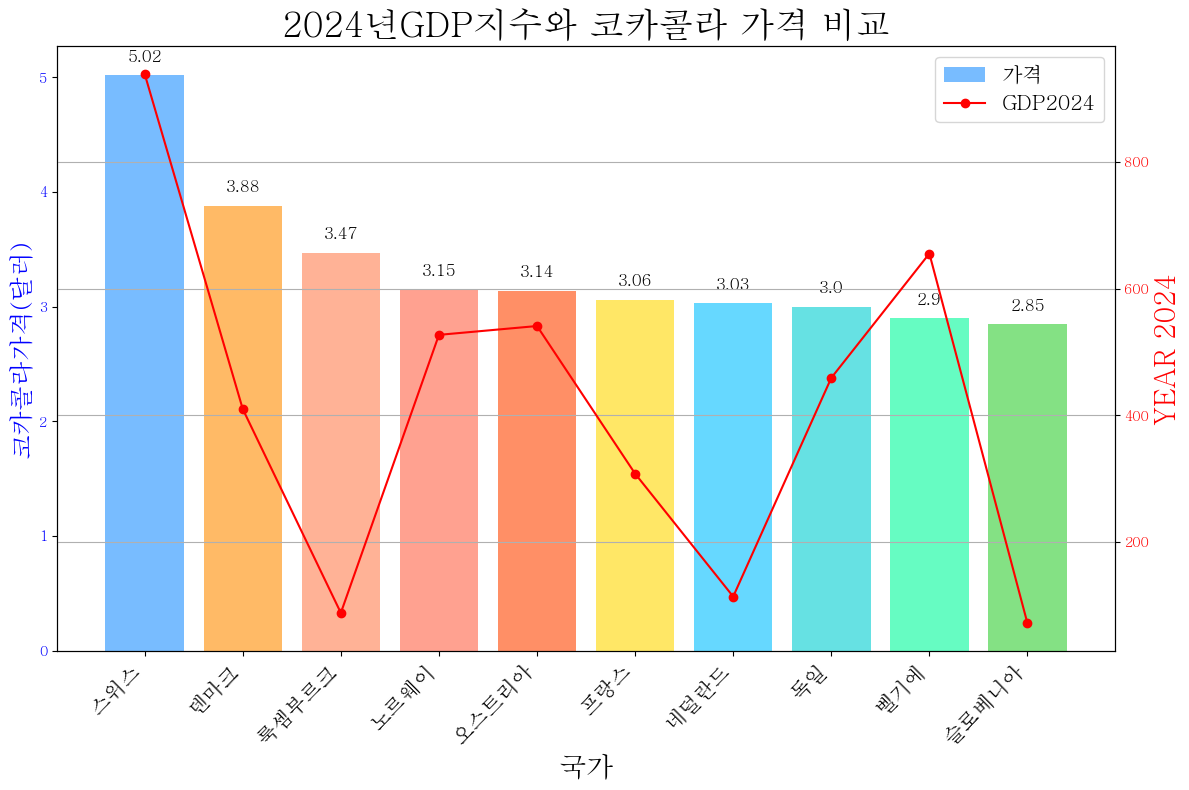

In [116]:
# 설정을 gdq 지수 수정  , 국가 수정----- 하고 한글로 바꿈------------------------

import	matplotlib.pyplot as	plt
import numpy as np

# 데이터
data = {
    "Country": ["스위스", "덴마크", "룩셈부르크", "노르웨이", "오스트리아", 
                "프랑스", "네덜란드", "독일", "벨기에", "슬로베니아"],
    "Price": [5.02, 3.88, 3.47, 3.15, 3.14, 3.06, 3.03, 3.00, 2.90, 2.85],
    "year_2024": [938.458, 409.989, 88.556, 526.951, 540.887, 
                 308.055, 114.251, 459.110, 655.192, 72.101]
}

df = pd.DataFrame(data)

width = 0.35  # 바의 너비
fig, ax1 = plt.subplots(figsize=(12, 8))


#색상
colors = ['#1E90FF', '#FF8C00', '#FF7F50', '#FF6347', '#FF4500',
              '#FFD700', '#00BFFF', '#00CED1', '#00FA9A', '#32CD32',
              '#ADFF2F', '#9ACD32', '#DAA520', '#FF69B4', '#DDA0DD',
              '#8A2BE2', '#6A5ACD', '#9370DB', '#4682B4', '#B0E57C']

# 코카콜라 가격  s
bars=ax1.bar(df['Country'], df['Price'], color=colors[:len(df['Country'])], alpha=0.6, label='가격')
ax1.set_xlabel('국가',size=20)
ax1.set_ylabel('코카콜라가격(달러)', color='b', size=18)
ax1.tick_params(axis='y', labelcolor='b')

# x축 레이블 크기 조절
ax1.set_xticklabels(df['Country'], rotation=45, ha='right', fontsize=15)

# GDP 선으로 
ax2 = ax1.twinx()
ax2.plot(df['Country'], df['year_2024'], color='r', marker='o', label='GDP2024')
ax2.set_ylabel('YEAR 2024', color='r',size=20)
ax2.tick_params(axis='y', labelcolor='r')


# 바 그래프 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=12)



#제목
plt.title('2024년GDP지수와 코카콜라 가격 비교', size=25)
fig.tight_layout()


# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=15)


plt.grid()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\mnt\\data\\filtered_countries_scores_updated.png'

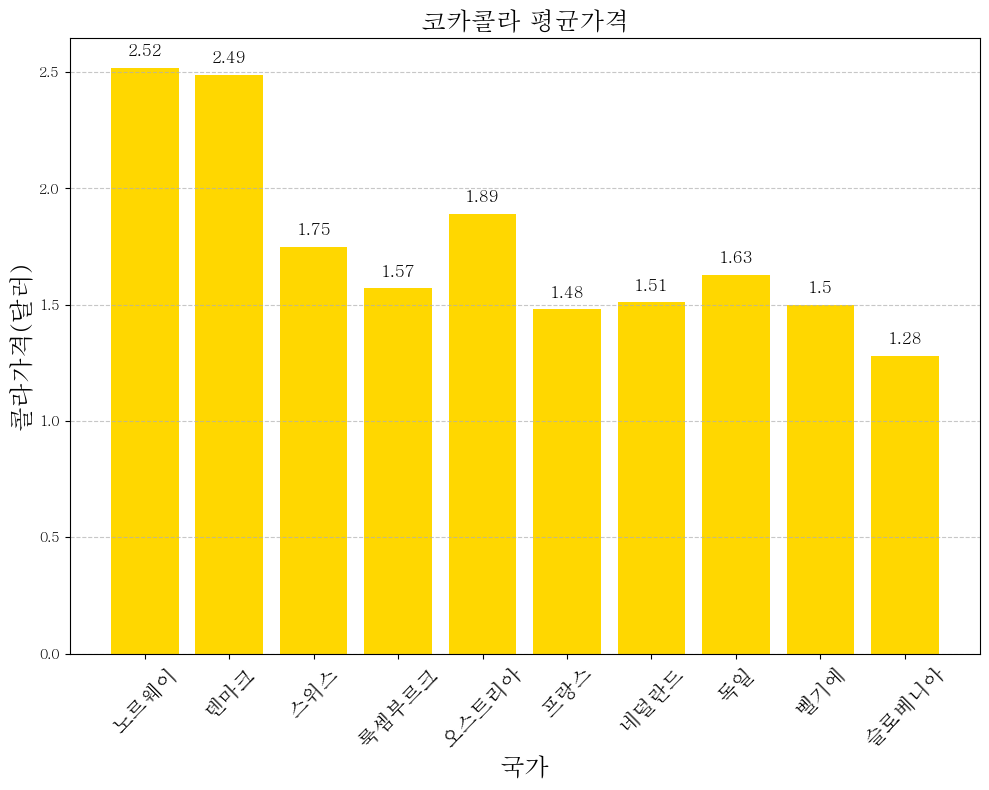

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_countries_updated = ['스위스', '덴마크', '룩셈부르크', '노르웨이', '오스트리아', '프랑스', '네덜란드', '독일', '벨기에', '슬로베니아']


data_updated = {
    'Country': ['노르웨이', '덴마크', '스위스', '룩셈부르크', '오스트리아', '프랑스', '네덜란드', '독일', '벨기에', '슬로베니아'],
    'Score': [2.52, 2.49, 1.75, 1.57, 1.89, 1.48, 1.51, 1.63, 1.50, 1.28]
}

df_updated = pd.DataFrame(data_updated)


plt.figure(figsize=(10, 8))
bars = plt.bar(df_updated['Country'], df_updated['Score'], color='gold')
plt.xlabel('국가', fontsize=18)
plt.ylabel('콜라가격(달러)', fontsize=18)
plt.title('코카콜라 평균가격', fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', fontsize=12)

plt.tight_layout()


updated_image_path = '/mnt/data/filtered_countries_scores_updated.png'
plt.savefig(updated_image_path)

plt.show()

updated_image_path

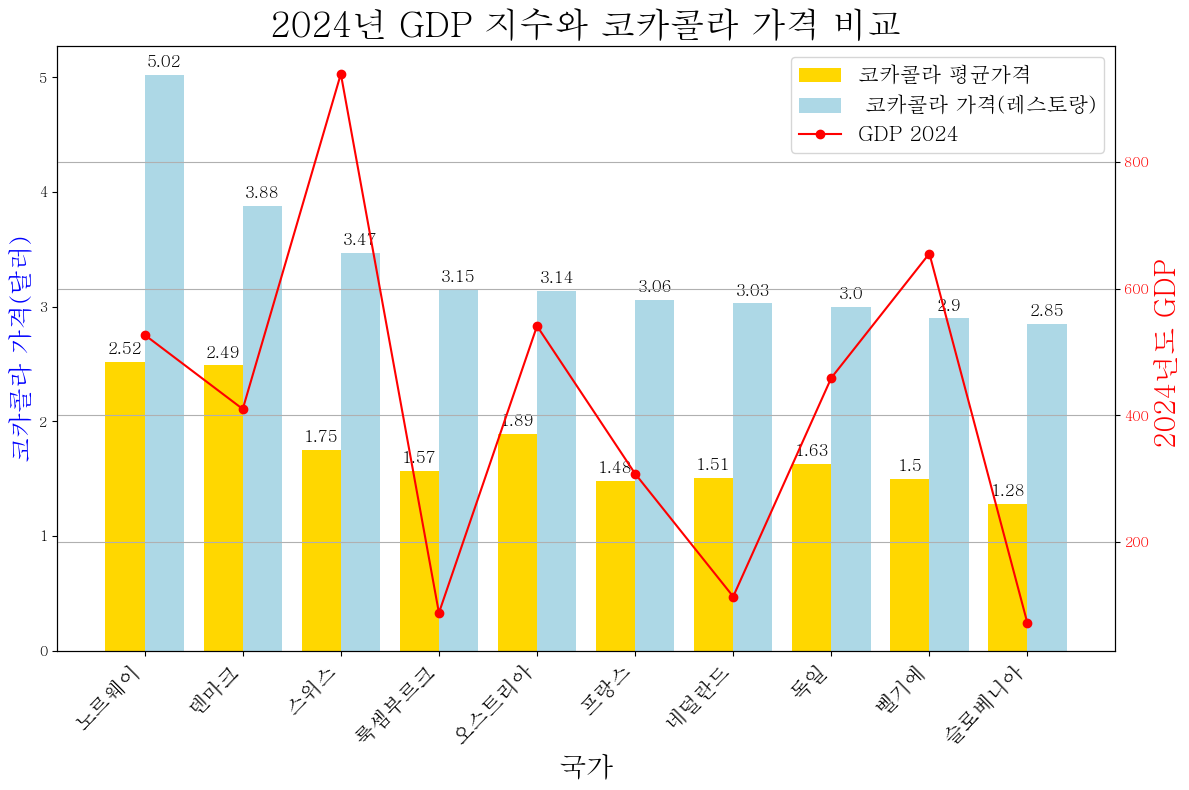

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
data_price = {
    'Country': ['노르웨이', '덴마크', '스위스', '룩셈부르크', '오스트리아', '프랑스', '네덜란드', '독일', '벨기에', '슬로베니아'],
    'CocaCola_Price': [2.52, 2.49, 1.75, 1.57, 1.89, 1.48, 1.51, 1.63, 1.50, 1.28],
    'Average_Price': [5.02, 3.88, 3.47, 3.15, 3.14, 3.06, 3.03, 3.00, 2.90, 2.85]
}

data_gdp = {
    'Country': ["스위스", "덴마크", "룩셈부르크", "노르웨이", "오스트리아", "프랑스", "네덜란드", "독일", "벨기에", "슬로베니아"],
    'GDP_2024': [938.458, 409.989, 88.556, 526.951, 540.887, 308.055, 114.251, 459.110, 655.192, 72.101]
}

# 데이터프레임 생성
df_price = pd.DataFrame(data_price)
df_gdp = pd.DataFrame(data_gdp)

# 두 데이터프레임 병합
df_merged = pd.merge(df_price, df_gdp, on='Country', how='inner')

# 색상 설정
colors = ['#1E90FF', '#FF8C00', '#FF7F50', '#FF6347', '#FF4500',
          '#FFD700', '#00BFFF', '#00CED1', '#00FA9A', '#32CD32']

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 8))

# 코카콜라 가격 바 그래프
width = 0.4  # 바의 너비
x = np.arange(len(df_merged['Country']))

bars1 = ax1.bar(x - width/2, df_merged['CocaCola_Price'], width, color='gold', label='코카콜라 평균가격')
bars2 = ax1.bar(x + width/2, df_merged['Average_Price'], width, color='lightblue', label=' 코카콜라 가격(레스토랑)')

ax1.set_xlabel('국가', size=20)
ax1.set_ylabel('코카콜라 가격(달러)', color='b', size=18)
ax1.set_xticks(x)
ax1.set_xticklabels(df_merged['Country'], rotation=45, ha='right', fontsize=15)

# GDP 선 그래프
ax2 = ax1.twinx()
ax2.plot(df_merged['Country'], df_merged['GDP_2024'], color='r', marker='o', label='GDP 2024')
ax2.set_ylabel('2024년도 GDP ', color='r', size=20)
ax2.tick_params(axis='y', labelcolor='r')

# 바 그래프 위에 값 표시
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=12)

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=12)

# 그래프 제목 설정
plt.title('2024년 GDP 지수와 코카콜라 가격 비교', size=25)
fig.tight_layout()

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=15)

# 그리드 추가
plt.grid()

# 그래프 표시
plt.show()
